# Curso manejo de bases de datos con Python

**Autor: Luis Fernando Apáez Álvarez**

## Clase 1: Conexión con PostgreSQL

* [Creacón de una BD y una tabla](#parte1)
* [Conexión a la base de datos](#parte2)
* [Utilizando el módulo pandas](#parte3)
* [Administrador de contextos](#parte4)

En esta primer clase estableceremos la conexión con PostgreSQL, por ello es necesario tenerlo previamente instalado. Si requieres ayuda para su instalación, puedes consultar por ejemplo:

[Instalación Postgres](http://repositorio.puce.edu.ec/bitstream/handle/22000/14122/Anexo%204%20-%20Manual%20T%C3%A9cnico.pdf?sequence=3&isAllowed=y)

Después, instalaremos el paquete de <span style="color:rgb(10,10,150)">Python</span> necesario para realizar la conexión, lo cual podemos hacer desde consola (_símbolos del sistema_) o desde esta propia libreta. Para instalar dicho paquete desde esta libreta escribimos en una celda de código

In [1]:
!pip install psycopg2

You should consider upgrading via the 'c:\users\weeee\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


nótese que colocamos al inicio el símbolo ``!`` para ejecutar dicho comando. En mi caso, como ya tenía instalado el paquete se ha arrojado un mensaje de que éste se encuentra ya instalado en cierta ubicación de mi ordenador.
Si ejecutaramos el código anterior desde consola, se omite el símbolo ``!``.

## Creación de una BD y una tabla <a id="parte1"></a>

Ahora bien, para este punto es preciso que tengas instalado ya el PostgreSQL en tu ordenador, además, será necesario que hayas creado una base de datos y una tabla en _pgAdmin_. Puedes consultar las siguientes clases introductorias al lenguaje SQL en pgadmin que también hemos creado para tí:

* [Creación de una base de datos](https://luisapaez.github.io/Curso_Postgres/Clase1.html)

* [Creación de una tabla](https://luisapaez.github.io/Curso_Postgres/Clase2.html)

En este curso de **Manejo de bases de datos con Python** veremos los comandos básicos SQL para trabajar a lo largo del curso, pero nos enfocaremos más en la implementación de <span style="color:rgb(10,10,150)">Python</span> para trabajar con las bases de datos. Así, si es de tu interés profundizar en temas más avanzados de SQL con PostgreSQL (lo cual te recomendamos), puedes consultar nuestro otro curso enfocado en ello:

[Curso PostgreSQL](https://luisapaez.github.io/Curso_Postgres/)

En este curso trabajaremos con la misma base de datos que se crea en la clase ``Creación de una base de datos``, es decir, trabajaremos con la BD ``CursoPostgres``. Después, en _pgAdmin_, crearemos una tabla con los siguientes registros:

```SQL
-- creamos la tabla
CREATE TABLE curso_python(
id_curso SERIAL,
nombre VARCHAR,
apellido VARCHAR,
edad INT,
ciudad VARCHAR
);

-- Insertamos algunos registros

INSERT INTO curso_python(nombre, apellido, edad, ciudad) VALUES('Luis', 'Apáez', 24, 'CDMX');
INSERT INTO curso_python(nombre, apellido, edad, ciudad) VALUES('Pedri', 'López', 14, 'Guadalajara');
INSERT INTO curso_python(nombre, apellido, edad, ciudad) VALUES('Luis', 'Apáez', 24, 'Toluca');
```

donde escribimos ``CREATE TABLE`` para crear una tabla y después de nombrarla (en nuestro caso colocamos _curso_python_) definimos las columnas que tendrá nuestra tabla así como el tipo de datos correspondiente. El tipo de dato ``SERIAL`` es un autoincremento por lo que en los _insert's_ no hemos ingresado valor para dicha columna. El autoincremento comienza en 1 e irá subiendo de uno en uno de acuerdo al número de filas de nuestra tabla.

Después, para ingresar valores a nuestra tabla ponemos 

```sql
INSERT INTO <<nombre de la tabla>>() VALUES();
```

donde después del nombre de la tabla en la cual deseamos ingresar la información ponemos unos paréntesis para especificar las columnas en la cuales ingresaremos un valor, seguido de colocar ``VALUES()`` y escribir dentro justamente los valores a ingresar. Por ello escribimos, por ejemplo, la inserción:

```sql
INSERT INTO curso_python(nombre, apellido, edad, ciudad) VALUES('Luis', 'Apáez', 24, 'Toluca');
```

Una vez que ejecutamos el código anterior en _pgAdmin_ y que dicha ejecuación ha sido exitosa:

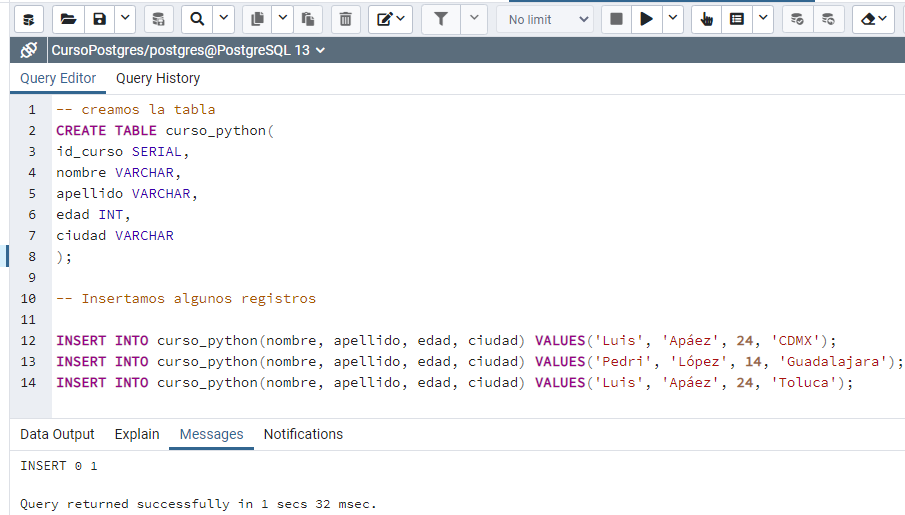

procedemos a realizar la conexión entre <span style="color:rgb(10,10,150)">Python</span> y postgres.

## Conexión a la base de datos <a id="parte2"></a>

Lo primero que haremos será importar el módulo que previamente descargamos

In [5]:
# Importamos el módulo necesario

import psycopg2

Después, crearemos un objeto que llameremos ``conexion`` para crear la propia conexión con la base de datos. Para crear esta conexión requerimos de cierta información: 

In [11]:
# Creamos el objeto conexion

conexion = psycopg2.connect(
    
    # (1)
    user='postgres',
    # (2)
    password='31416',
    # (3)
    host='127.0.0.1',
    # (4)
    port='5432',
    # (5)
    database='CursoPostgres')

donde

1. Es el usuario que definimos en la instalación de postgres, en general el usuario es _postgres_, a menos que lo hayas cambiado en la instalación.
2. Aquí va la contraseña que definiste a la hora de la instalación.
3. Dado que estamos trabajando en un ordenador, el _host_ será el _localhost_. El _localhost_ tiene, en todos los ordenadores, la dirección IP _127.0.0.1_
4. En la instalación del postgres colocamos el puerto _5432_ (a menos que hayas definido otro puerto).
4. La base de datos con la que trabajamos (que previamente creamos en _pgAdmin_) es ``CursoPostgres``.

Si todo ha salido correcto, al ejecutar ``print(conexion)`` debe salir algo como

In [4]:
print(conexion)

<connection object at 0x00000150574AEB88; dsn: 'user=postgres password=xxx dbname=CursoPostgres host=127.0.0.1 port=5432', closed: 0>


Procedemos despúes ha crear un cursor (el cual nos permite ejecutar sentencias SQL):

In [5]:
cursor = conexion.cursor()

Ahora bien, al escribir en SQL

```sql
SELECT * FROM curso_python;
```

se nos arrojarán todos los registros de nuestra tabla ``curso_python``. Vemos esto en _pgAdmin_:

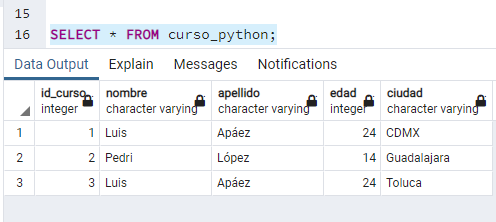

Podemos ahora realizar la misma consulta desde <span style="color:rgb(10,10,150)">Python</span>. Así, después de haber creado el cursor, creamos la consulta que deseamos, para lo cual definimos un objeto que llamaremos ``query``:

In [6]:
# Consulta
query = 'SELECT * FROM curso_python'

lo que sigue es ejecutar dicha consulta, lo que logramos escribiendo

In [7]:
# Ejecución
cursor.execute(query)

Si bien hemos ejecutado la consulta aún no podemos visualizarla como tal. Para visualizarla debemos recuperar los registros (valores dentro de la tabla); después de ello ya podremos ver los registros de la tabla ``curso_python``

In [8]:
# Recuperamos los registros
registros = cursor.fetchall()

# Vemos los registros de la tabla curso_python
print(registros)

[(1, 'Luis', 'Apáez', 24, 'CDMX'), (2, 'Pedri', 'López', 14, 'Guadalajara'), (3, 'Luis', 'Apáez', 24, 'Toluca')]


Notamos que el _output_ de la tabla está en forma de una lista, donde dentro de ésta están las filas de la tabla ``curso_python`` en forma de tuplas. De esta forma es como hemos hecho la conexión con la base de datos desde python y así accedimos a los registros de la tabla ``curso_python``. Cada que hagamos una conexión debemos cerrarla para no gastar recursos de más, de tal manera, escribimos

In [9]:
# Cerramos el cursor
cursor.close()

# Cerramos la conexion
conexion.close()

## Utilizando el módulo pandas <a id="parte3"></a>

La librería _pandas_ se especializa en el manejo y análisis de estructuras de datos. Esta librería la ocuparemos para **ver** de mejor manera los resultados de las consultas. Recordemos del _output [8]_ que la salida de los registros de la tabla ``curso_python`` estaban en formato de lista, donde cada elemento de la lista (que es un tupla) corresponde a una fila de la tabla. 

Para visualizar de mejor manera dicho resultado ocuparemos la librería _pandas_.

Para ello:

In [11]:
# Importamos el módulo
import pandas as pd

# Creamos el dataframe a partir de "registros"
df = pd.DataFrame(registros)

# vemos el dataframe
df

,0,1,2,3,4
0,1,Luis,Apáez,24,CDMX
1,2,Pedri,López,14,Guadalajara
2,3,Luis,Apáez,24,Toluca


con lo cual se mejora bastantemente la visualización de los registros de la tabla ``curso_python``. Notamos un pequeño detalle el cual consiste en el nombre de las columnas. Vemos que se ha generado en automático una numeración para nombrar a las columnas, sin embargo, es de nuestro interés ver el nombre original como lo definimos en _pgAdmin_.

Una forma de colocar el nombre original de las columnas es cambiando directamente el nombre de las columnas del dataframe. Primero, veamos que

In [14]:
df.columns

RangeIndex(start=0, stop=5, step=1)

``df.columns`` nos arroja el "nombre" dado a las columnas del dataframe ``df``, en el cual se muestra la numeración que comienza en uno y termina en 4 (pues tenemos 5 columnas).
Para cambiar dichos "nombres" escribimos:

In [15]:
df.columns = ['id_curso', 'nombre', 'apellido', 'edad', 'Ciudad']

que son acordes al nombre original de las columnas de la tabla ``curso_python``. Nuevamente utilizamos el código

In [16]:
df.columns

Index(['id_curso', 'nombre', 'apellido', 'edad', 'Ciudad'], dtype='object')

para ver que el nombre de las columnas del dataframe ``df`` han cambiado. En efecto

In [17]:
df

,id_curso,nombre,apellido,edad,Ciudad
0,1,Luis,Apáez,24,CDMX
1,2,Pedri,López,14,Guadalajara
2,3,Luis,Apáez,24,Toluca


## Administrador de contextos <a id="parte4"></a>

En ocasiones puede ocurrir que estamos trabajando con recursos sensibles y/o de especial cuidado, tales como un archivo o una conexión con una base de datos (como es nuestro caso). De este modo es que requirimos de la construcción de un ciclo de vida alrededor de estos recursos, como una inicialización , liberación de recursos, etcétera. Pues si no se liberan de alguna forma, en muchos casos se pueden desencadenar fugas que no son nada buenas. Para ello, Python nos brinda de una herramienta para administrar los recursos de manera automática, utilizando ``with-as``. La sintaxis básica es:

```python
with <administrador de contexto> as <alias>:
    declaración 1
    declaración 2
    .
    .
    .
```

donde la parte de ``as`` (alias) es opcional. Los administradores de contexto son muy útiles en caso de que nuestro programa tenga alguna excepción. El desarrollador no tiene que preocuparse de que la limpieza suceda o no. 

De tal manera, así como hicimos la conexión con la base de datos y el código que ocupamos para ejecutar la consulta, además del código para cerrar la cenexión, crearemos un administrador de contextos utilizando ``with-as`` que englobe todo lo anterior. Por ende, escribimos:

In [12]:
try:
    # Creamos un administrador de contexto para la conexion
    # con la base de datos
    with conexion:

        # Creamos otro administrador para el cursor
        with conexion.cursor() as cursor:
            query = 'SELECT * FROM curso_python'
            cursor.execute(query)
            registros = cursor.fetchall()
            print(registros)

# Arrojamos un mensaje en caso de error
except Exception as e:
    print(f'Ocurrio un error: {e}')

# Finalmente cerramos la conexion y el cursor
finally:
    cursor.close()
    conexion.close()

[(1, 'Luis', 'Apáez', 24, 'CDMX'), (2, 'Pedri', 'López', 14, 'Guadalajara'), (3, 'Luis', 'Apáez', 24, 'Toluca')]


Observamos que dentro del administrador de contextos hemos colocado un control de excepciones, con lo cual estamos controlando posibles errores a la hora de ejecutar la consulta o a la hora de ver los registros de la tabla. Además, se agregó al final de la excepción una sentencia para ejecutar al final del ``try-except``, la cual es ``finally``, donde declaramos el cierre de la conexión y del cursor.

Podemos completar más lo anterior agregando

In [15]:
import pandas as pd

try:
    # Creamos la conexion
    conexion = psycopg2.connect(
        user='postgres',
        password='31416',
        host='127.0.0.1',
        port='5432',
        database='CursoPostgres')
    
    # Creamos un administrador de contexto para la conexion
    # con la base de datos
    with conexion:

        # Creamos otro administrador para el cursor
        with conexion.cursor() as cursor:
            query = 'SELECT * FROM curso_python'
            cursor.execute(query)
            registros = cursor.fetchall()
            df = pd.DataFrame(registros)
            print(df)

# Arrojamos un mensaje en caso de error
except Exception as e:
    print(f'Ocurrio un error: {e}')

# Finalmente cerramos la conexion y el cursor
finally:
    cursor.close()
    conexion.close()

   0      1      2   3            4
0  1   Luis  Apáez  24         CDMX
1  2  Pedri  López  14  Guadalajara
2  3   Luis  Apáez  24       Toluca


Con lo anterior hemos conseguido un control óptimo y seguro de nuestra conexión a la base de datos mediante el manejo de excepciones y el administrador de contextos.